<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_2_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amit Anand 
### 4th Sem
### DSE B

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("winequality-red.csv")

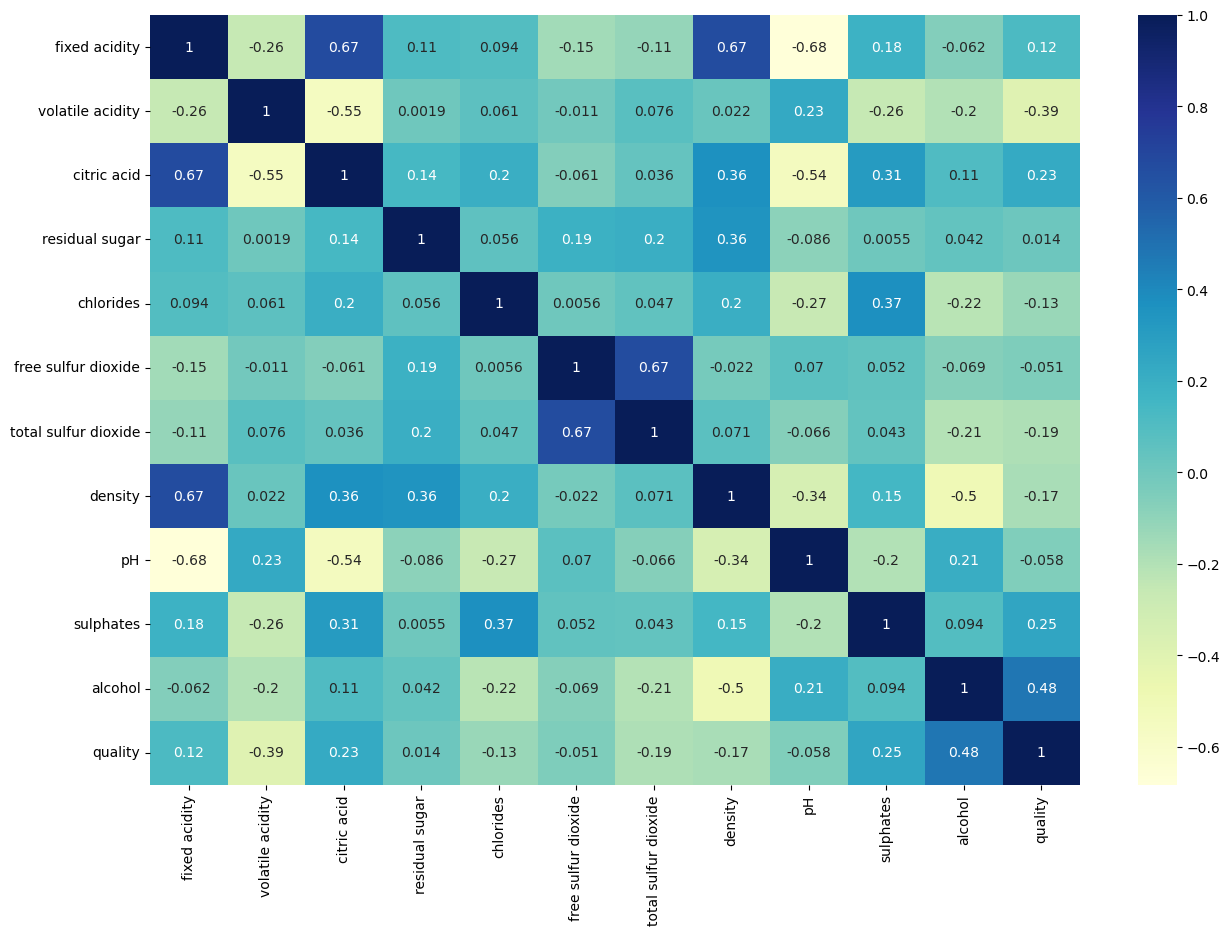

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

/Users/amitanand/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


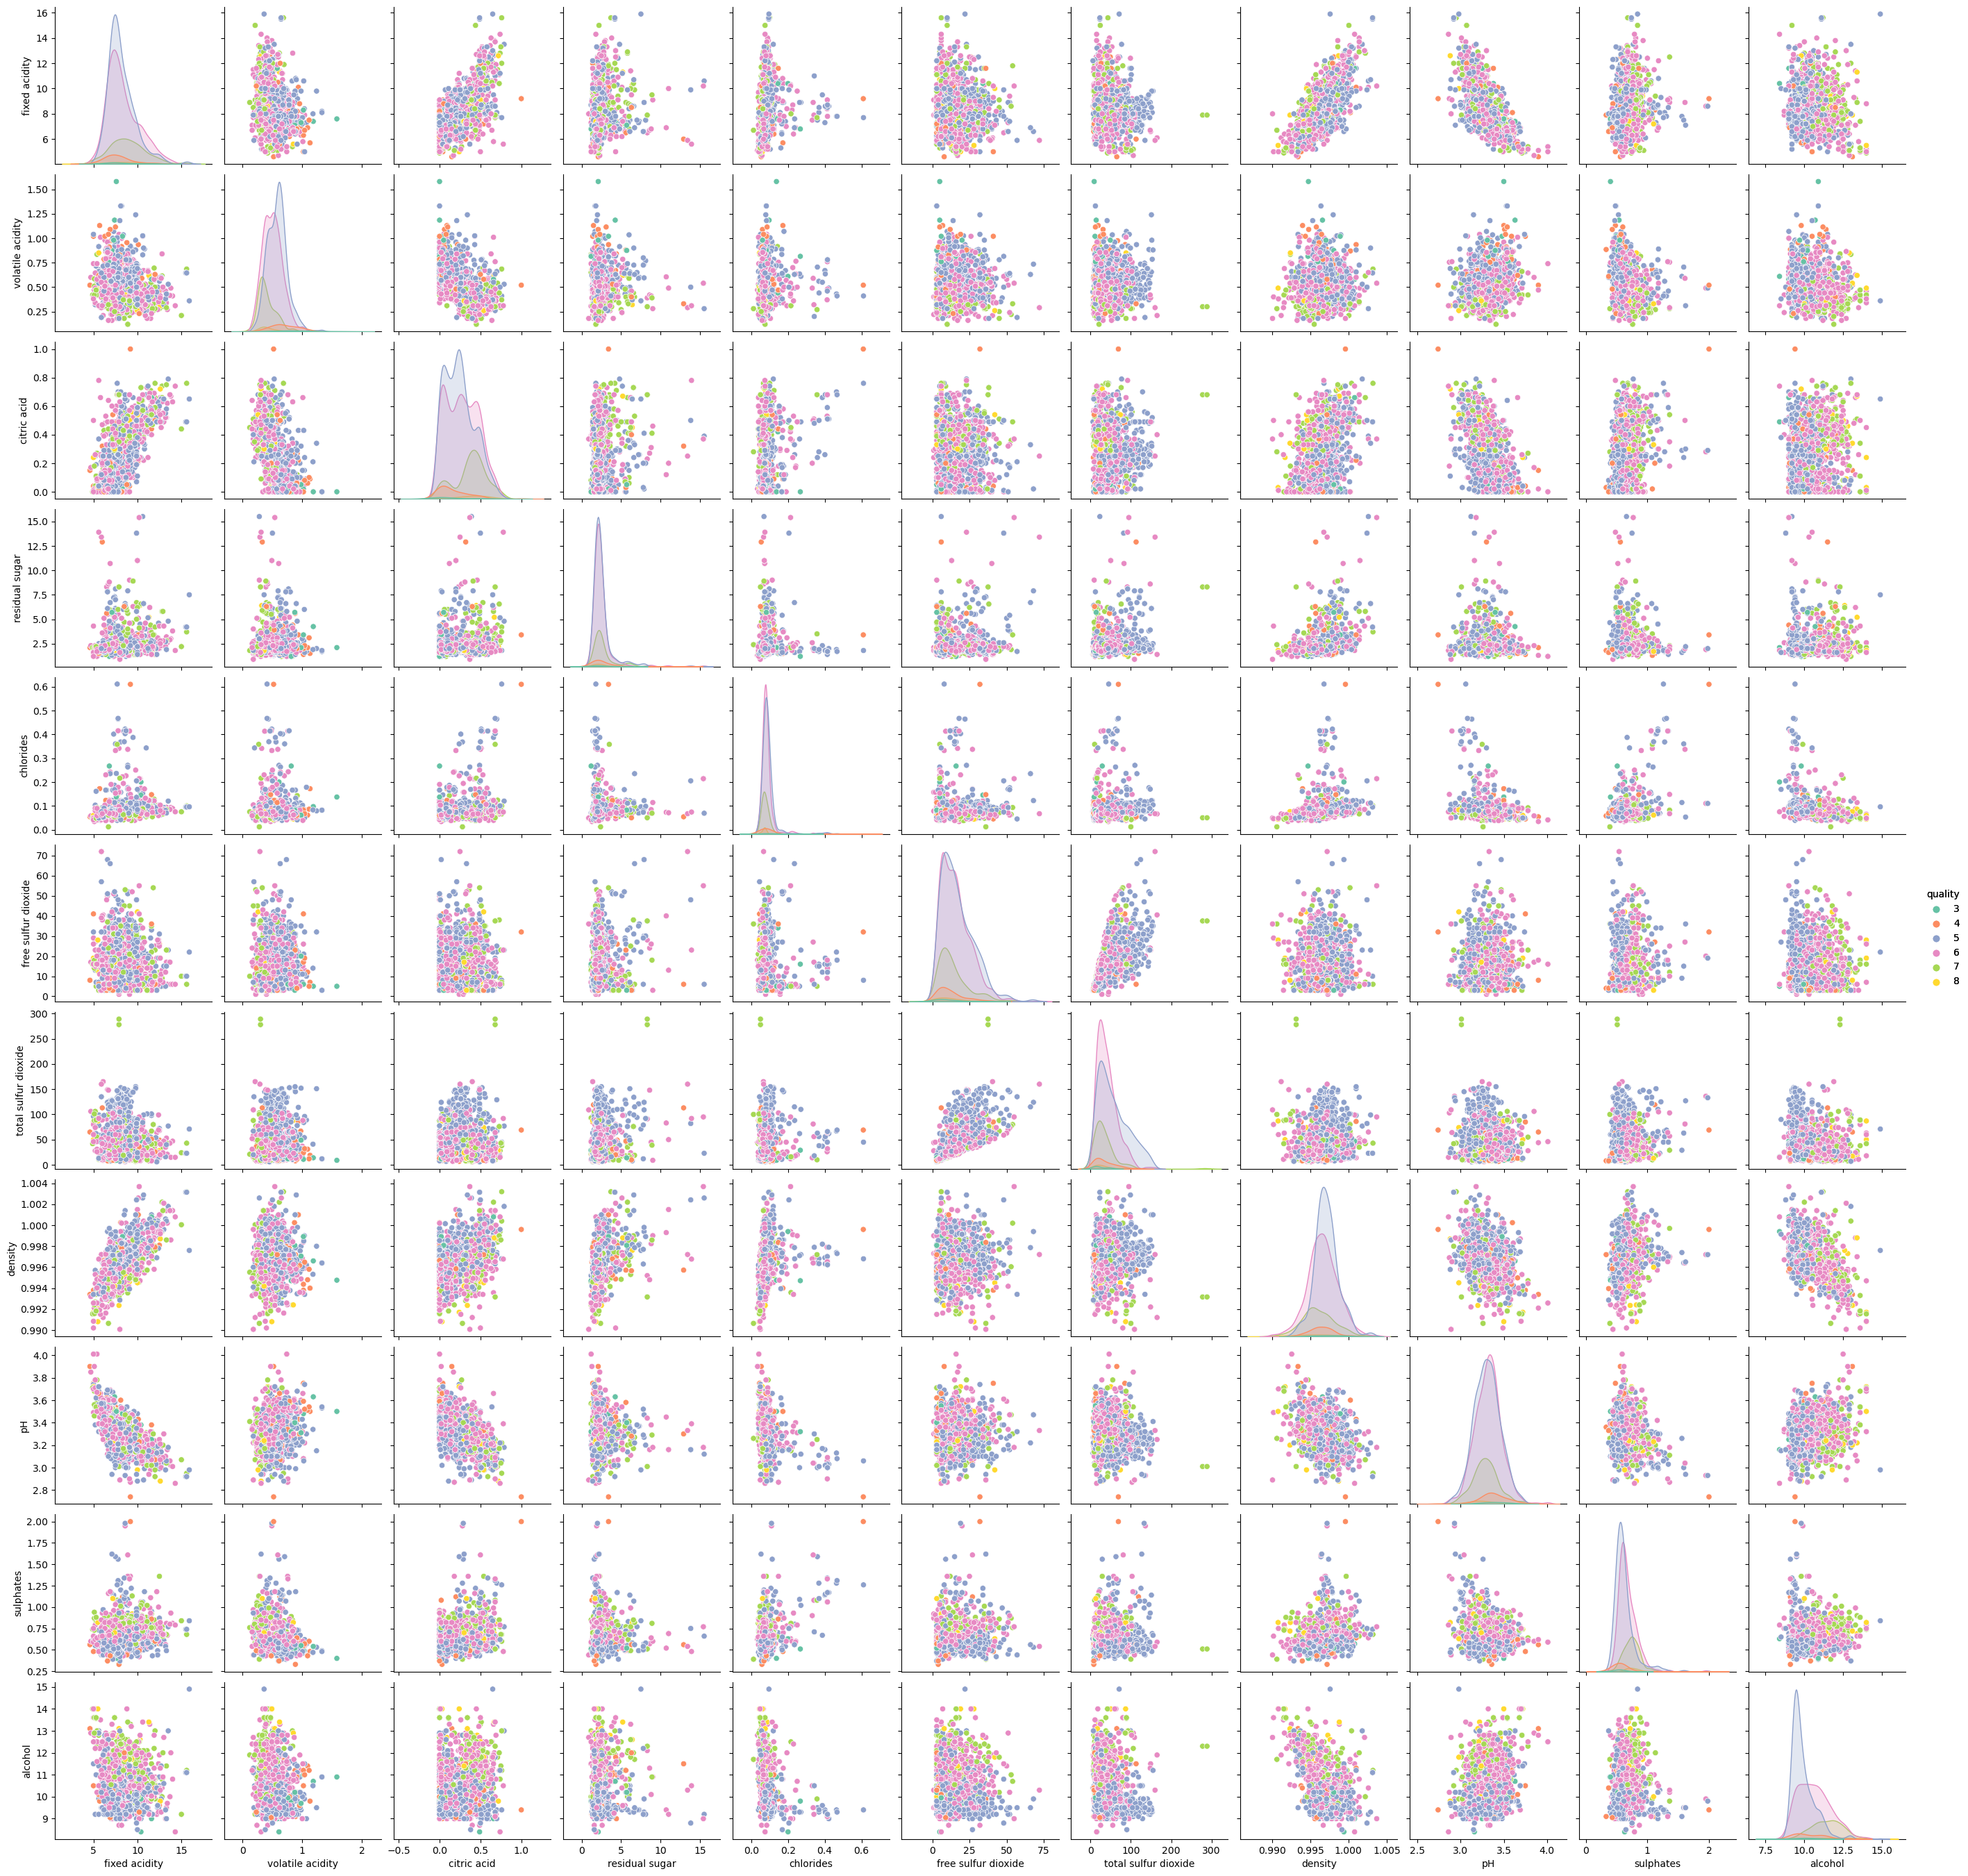

In [4]:
g = sns.pairplot(df, hue="quality", palette="Set2", diag_kind="kde", height=2.5)
g.add_legend()

In [9]:
X = df[['fixed acidity']].values
y = df['pH']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
poly = PolynomialFeatures(degree = 2) 
X_poly_train = poly.fit_transform(X_train) 
X_poly_test = poly.transform(X_test)

In [12]:
lreg=LinearRegression()

In [15]:
lreg.fit(X_poly_train,y_train)

LinearRegression()

In [18]:
y_pred=lreg.predict(X_poly_test)

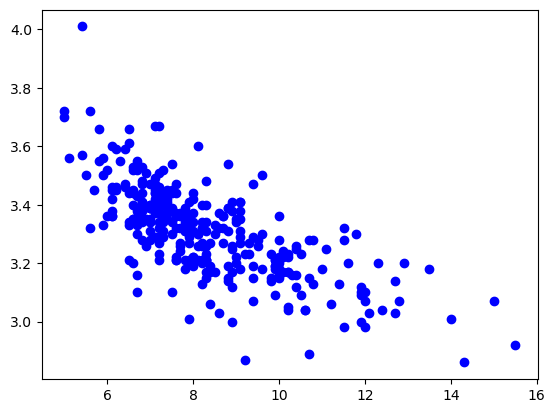

In [19]:
plt.scatter(X_test,y_test,color='blue',label='Actual Data')

In [20]:
sort_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sort_indices]

In [22]:
X_poly_test_sorted = poly.transform(X_test_sorted)
y_pred_sorted = lreg.predict(X_poly_test_sorted)

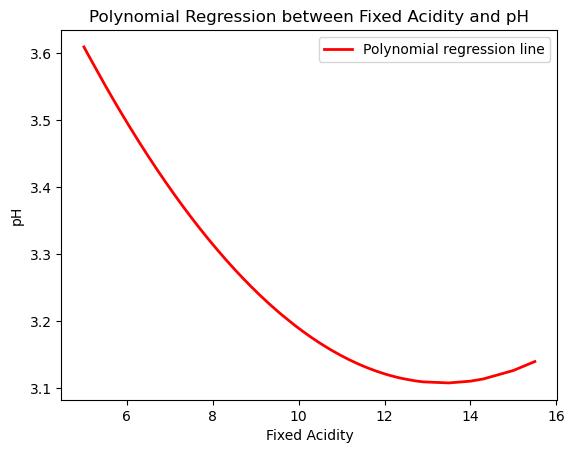

In [24]:
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial regression line')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.legend()
plt.title('Polynomial Regression between Fixed Acidity and pH')
plt.show()

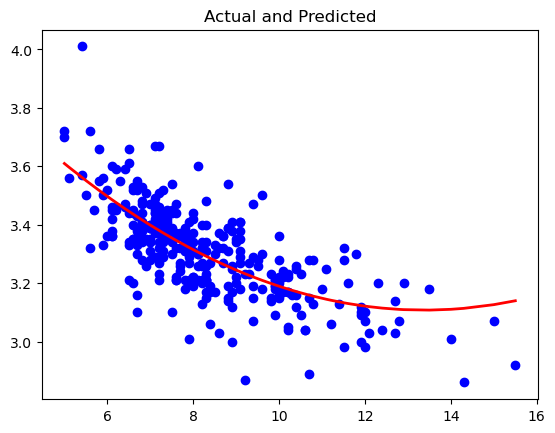

In [25]:
plt.scatter(X_test,y_test,color='blue',label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial regression line')
plt.title("Actual and Predicted")
plt.show()

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Square Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Square Error (MSE): 0.011652001804409956
Mean Absolute Error (MAE): 0.08132574758779673
Root Mean Square Error (RMSE): 0.10794443850615906
